In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from math import log 
import matplotlib.pyplot as plt


In [12]:
a = pd.read_csv('dataTrue.txt',delimiter='\t', header=None)

In [13]:
a.rename(columns={0:'Lenght', 1: 'Time'}, inplace=True)


In [14]:
pd.options.plotting.backend = "plotly"
a.plot.scatter(x='Lenght', y='Time')



$$y = ax + b$$

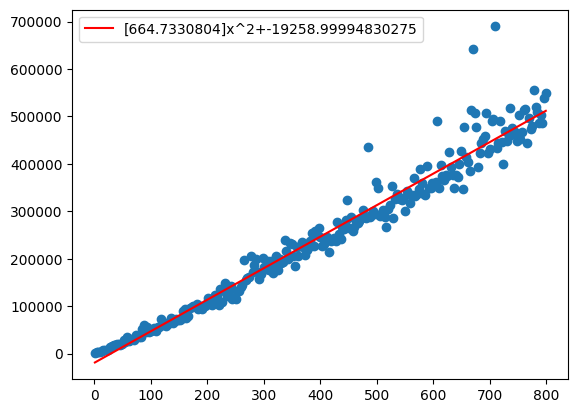

-19258.99994830275 [664.7330804]


In [15]:
model = LinearRegression().fit(a.Lenght.array.reshape(-1,1), a.Time.array)
plt.plot(a.Lenght.array, a.Time.array, 'o', label='')
plt.plot(a.Lenght.array, model.intercept_+model.coef_*a.Lenght.array, 'r', label="{a}x^2+{b}".format(b=model.intercept_,a=model.coef_))
plt.legend()
plt.show()

print(model.intercept_, model.coef_)

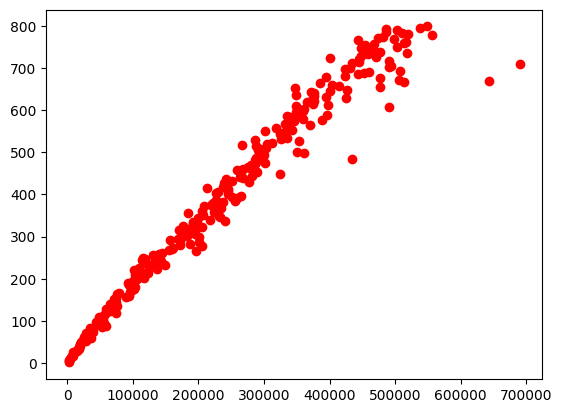

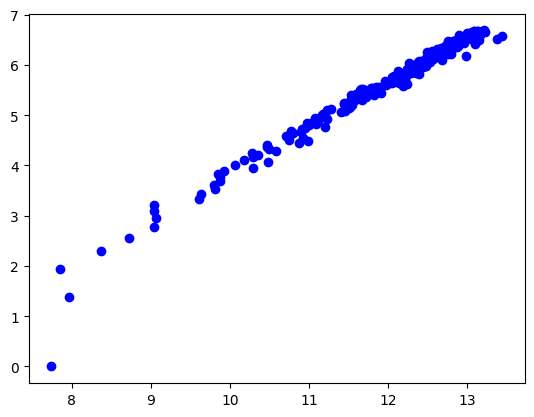

In [16]:

A = np.loadtxt('dataTrue.txt')
x = A[:,1]
y = A[:,0]


x2 = [log(x) for x in x]
y2 = [log(y) for y in y]

plt.plot(x,y, 'or')
plt.show()

plt.plot(x2,y2, 'ob')
plt.show()
